In [1]:
# 载入数据
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt


In [53]:
import glob
glob.glob(r'.\data\hw\*2015*')

['.\\data\\hw\\data_2015_1.txt',
 '.\\data\\hw\\data_2015_12.txt',
 '.\\data\\hw\\data_2015_2.txt',
 '.\\data\\hw\\data_2015_3.txt',
 '.\\data\\hw\\data_2015_4.txt',
 '.\\data\\hw\\data_2015_5.txt']

In [3]:
fname = '.\data\hw\data_2015_{0}.txt'
frnames = []
data_cols = ['id','type','time']
for i in range(5):
    data_i = pd.read_table(fname.format(i+1),sep='\t',header=None,names=data_cols)
    frnames.append(data_i)

data = pd.concat(frnames)
data['amount'] = 1
data['time'] = pd.to_datetime(data['time'])
data.head()

,id,type,time,amount
0,56498c50-84e4,flavor15,2015-01-01 19:03:32,1
1,56498c51-8cb9,flavor15,2015-01-01 19:03:34,1
2,56498c52-a50e,flavor8,2015-01-01 23:26:04,1
3,56498c53-a241,flavor2,2015-01-02 18:25:23,1
4,56498c54-8528,flavor8,2015-01-02 21:03:49,1


In [4]:
# 必要函数
def myvstack(up,down):
    return np.vstack((up,down))

def clearcount(data):
    type_list = list(set(data['type']))
    count_dict = dict()
    for i in range(len(type_list)):
        count_dict[type_list[i]]=[]
    return type_list,count_dict

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
    
def my_draw_trend(timeSeries, size):
    plt.figure(num = 5,facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    #timeSeries.plot(color='blue', label='Original')
    #rol_mean.plot(color='red', label='Rolling Mean')
    #rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.plot(timeSeries,color='blue', label='Original')
    plt.plot(rol_mean,color='red', label='Rolling Mean')
    plt.plot(rol_weighted_mean,color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
    
def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def my_testStationarity(ts):
    temp = np.array(ts)
    dftest = adfuller(temp)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# 创造型号列表用于索引每周统计数据
type_list = list(set(data['type']))
count_dict = dict()
for i in range(len(type_list)):
    count_dict[type_list[i]]=[]

In [6]:
# 创造每周时间范围，用于产生统计周期
i=1
k=1
time_arr = []
start_date = datetime(2015, 1, 1)
while(start_date<data.time.max()):
    end_date = start_date + timedelta(7)
    #print(start_date,end_date)
    time_arr.append([start_date,end_date])
    start_date = end_date
    i=i+1
    if i>50:
        break
time_arr

[[datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2015, 1, 8, 0, 0)],
 [datetime.datetime(2015, 1, 8, 0, 0), datetime.datetime(2015, 1, 15, 0, 0)],
 [datetime.datetime(2015, 1, 15, 0, 0), datetime.datetime(2015, 1, 22, 0, 0)],
 [datetime.datetime(2015, 1, 22, 0, 0), datetime.datetime(2015, 1, 29, 0, 0)],
 [datetime.datetime(2015, 1, 29, 0, 0), datetime.datetime(2015, 2, 5, 0, 0)],
 [datetime.datetime(2015, 2, 5, 0, 0), datetime.datetime(2015, 2, 12, 0, 0)],
 [datetime.datetime(2015, 2, 12, 0, 0), datetime.datetime(2015, 2, 19, 0, 0)],
 [datetime.datetime(2015, 2, 19, 0, 0), datetime.datetime(2015, 2, 26, 0, 0)],
 [datetime.datetime(2015, 2, 26, 0, 0), datetime.datetime(2015, 3, 5, 0, 0)],
 [datetime.datetime(2015, 3, 5, 0, 0), datetime.datetime(2015, 3, 12, 0, 0)],
 [datetime.datetime(2015, 3, 12, 0, 0), datetime.datetime(2015, 3, 19, 0, 0)],
 [datetime.datetime(2015, 3, 19, 0, 0), datetime.datetime(2015, 3, 26, 0, 0)],
 [datetime.datetime(2015, 3, 26, 0, 0), datetime.datetime(2

In [ ]:
# 清空已统计的数据
type_list, count_dict = clearcount(data)

In [7]:
# 统计各类型的数据并画出时间序列图
time_arr = np.array(time_arr)
for i in range(len(time_arr)):
    week_i=data[(time_arr[i,0] <= data.time) & (data.time <= time_arr[i,1])]
    for j in range(len(type_list)):
        count_dict[type_list[j]].append(week_i.loc[week_i.type==type_list[j]].count().amount)
weekly_data = pd.DataFrame(count_dict,index=time_arr[:,0])

In [8]:
weeksum = weekly_data.sum(axis=1)
datecsv = pd.DataFrame(time_arr[:,0],columns=['date'])
date_length = datecsv.count().date
weekcsv = weeksum.to_frame(name='sale').set_index(np.arange(date_length))
save = pd.concat([datecsv, weekcsv], axis=1)  
save.to_csv('weeksum.csv',index=False,sep=',')

In [76]:
weekly_data.diff()

,flavor1,flavor10,flavor11,flavor12,flavor13,flavor14,flavor15,flavor17,flavor18,flavor2,flavor21,flavor22,flavor23,flavor3,flavor4,flavor5,flavor6,flavor7,flavor8,flavor9
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,0.0,0.0,-2.0,6.0,0.0,27.0,1.0,-1.0,0.0,-1.0,1.0,0.0,2.0,3.0,1.0,14.0,-1.0,1.0,1.0,1.0
2015-01-15,0.0,0.0,3.0,-9.0,0.0,-27.0,12.0,0.0,1.0,0.0,-1.0,0.0,-2.0,-2.0,0.0,-10.0,2.0,-1.0,4.0,5.0
2015-01-22,0.0,0.0,0.0,-4.0,0.0,9.0,-19.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,-8.0,-8.0
2015-01-29,0.0,0.0,2.0,-1.0,0.0,-7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,3.0,5.0,1.0,5.0,1.0
2015-02-05,2.0,0.0,2.0,7.0,1.0,4.0,1.0,0.0,-1.0,0.0,0.0,7.0,0.0,1.0,1.0,-1.0,-4.0,-1.0,10.0,5.0
2015-02-12,-1.0,4.0,-4.0,-4.0,-1.0,-6.0,-1.0,0.0,-1.0,0.0,0.0,-7.0,0.0,0.0,-1.0,-1.0,1.0,15.0,19.0,1.0
2015-02-19,-1.0,-2.0,0.0,-2.0,0.0,7.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,-1.0,-3.0,-13.0,-29.0,3.0
2015-02-26,3.0,0.0,-4.0,-1.0,0.0,-5.0,1.0,-3.0,0.0,5.0,0.0,0.0,0.0,-2.0,0.0,33.0,13.0,3.0,23.0,15.0
2015-03-05,-3.0,-2.0,0.0,0.0,0.0,-2.0,-3.0,0.0,0.0,-10.0,0.0,0.0,0.0,-1.0,0.0,-35.0,-13.0,-4.0,-29.0,-25.0


#### 总量时间序列分析
1. 平稳性分析  
滑动平均图  
趋势图

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=7,min_periods=0,adjust=True,ignore_na=False).mean()


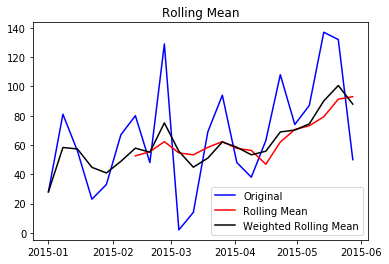

In [91]:
my_draw_trend(weekly_data_total,7)

In [105]:
my_testStationarity(weekly_data_total.loc[:,0])

Test Statistic                -1.574109e+01
p-value                        1.255636e-28
#Lags Used                     9.000000e+00
Number of Observations Used    1.200000e+01
Critical Value (1%)           -4.137829e+00
Critical Value (5%)           -3.154972e+00
Critical Value (10%)          -2.714477e+00
dtype: float64

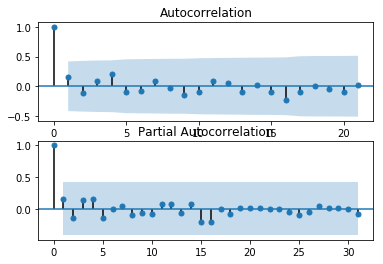

In [108]:
draw_acf_pacf(weekly_data_total)

In [110]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print('序列的纯随机性检测结果为：',acorr_ljungbox(weekly_data_total,lags = 1))

序列的纯随机性检测结果为： (array([ 0.57364815]), array([ 0.44881287]))


In [ ]:
from statsmodels.tsa.arima_model import ARMA
np_wdt = np.array(weekly_data_total)
model = ARMA(np_wdt, order=(1, 1)) 
result_arma = model.fit( disp=-1, method='css')

In [132]:
ts = weekly_data_total[0].astype('float')
sm.tsa.arma_order_select_ic(ts,max_ar=6,max_ma=4,ic='aic')['aic_min_order']  # AIC

D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsa

(0, 0)

In [133]:
sm.tsa.arma_order_select_ic(ts,max_ar=6,max_ma=4,ic='bic')['bic_min_order']  # BIC

D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\tsa\tsa

(0, 0)

In [151]:
ts = weekly_data_total[0].astype('float')
order = (1,0)
train = ts[:-5]
test = ts[-5:]
tempModel = sm.tsa.ARMA(train,order).fit()

In [152]:
tempModel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 175.2928  
Dependent Variable: y                Log-Likelihood:      -83.397   
Date:               2018-04-02 17:22 Scale:               1.0000    
No. Observations:   17               Method:              css-mle   
Df Model:           2                Sample:              01-01-2015
Df Residuals:       15                                    04-23-2015
Converged:          1.0000           S.D. of innovations: 32.658    
AIC:                172.7931         HQIC:                173.042   
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const        57.5489     6.9659    8.2615   0.0000   43.8959   71.2018
ar.L1.y      -0.1464     0.2566   -0.5707   0.5767   -0.6494    0.3565
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -6.8292             0.0000           6.8292             0.5000
====================================================================

"""

In [153]:
tempModel.forecast(5)

(array([ 50.16133337,  58.630608  ,  57.39045816,  57.57205242,  57.5454617 ]),
 array([ 32.65847466,  33.00674164,  33.01416879,  33.01432802,  33.01433143]),
 array([[ -13.84810075,  114.17076749],
        [  -6.06141686,  123.32263286],
        [  -7.31612364,  122.09703997],
        [  -7.13484147,  122.27894631],
        [  -7.16143888,  122.25236228]]))

In [154]:
delta = tempModel.fittedvalues - train
score = 1 - delta.var()/train.var()
print( score)

0.019031836606246633


5


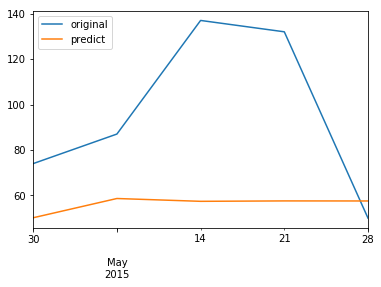

In [155]:
predicts = tempModel.predict('2015/4/30','2015/5/28', dynamic=True)
print( len(predicts))
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot()

In [171]:
decomposition = sm.tsa.seasonal_decompose(weekly_data_total, model='additive')
fig = decomposition.plot()

ValueError: operands could not be broadcast together with shapes (22,) (84,) 

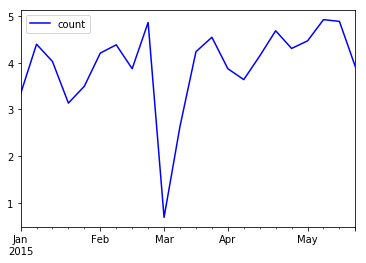

In [184]:
# 第三种方法
ts_log = np.log(weekly_data_total)
draw_ts(ts_log)


D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=2,min_periods=0,adjust=True,ignore_na=False).mean()


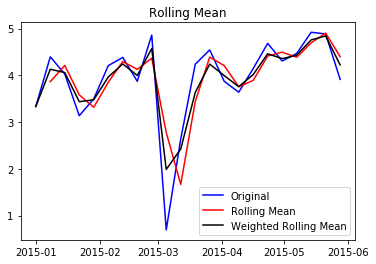

In [186]:
my_draw_trend(ts_log, 2)

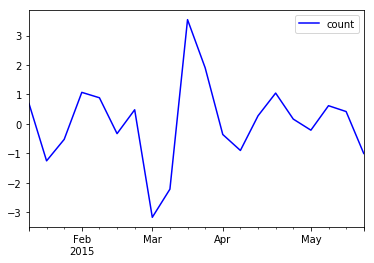

In [203]:
draw_ts(diff_2)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=2,min_periods=0,adjust=True,ignore_na=False).mean()


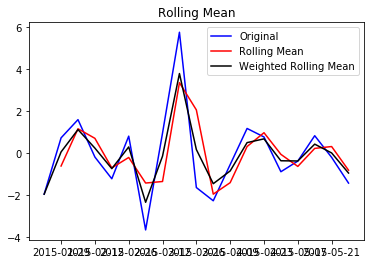

In [210]:
my_draw_trend(diff_2_1,2)

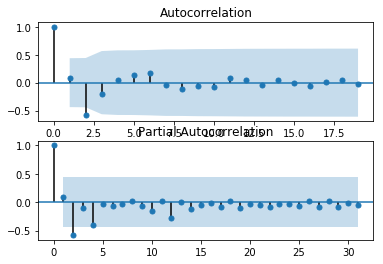

In [215]:
draw_acf_pacf(diff_2['count'])

In [ ]:
diff_2['count']+np.exp

(22, 1)

In [259]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ValueError: operands could not be broadcast together with shapes (22,) (84,) 

In [268]:
# 差分
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1['count'])

D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64

In [269]:
diff_2 = ts_log.diff(2)
diff_2.dropna(inplace=True)
diff_2_1 = diff_2.diff(1)
diff_2_1.dropna(inplace=True)
testStationarity(ts_log['count'])
ts_diff_1.diff(1)
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)

In [276]:
predict_ts.add()

pandas.core.series.Series

In [270]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(diff_2, order=(1, 0)) 
result_arma = model.fit( disp=-1, method='css')

In [279]:
# 样本拟合
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
#diff_recover_1 = predict_ts.add(diff_shift_ts)

In [271]:
# 样本拟合
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

TypeError: 'Timestamp' object is not iterable

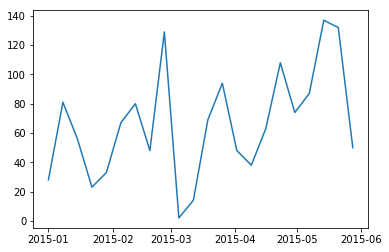

In [78]:
weekly_data_total = pd.DataFrame(weekly_data.sum(1))
import matplotlib.pyplot as plt
plt.plot(weekly_data.sum(1))

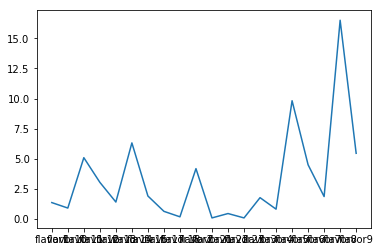

#### 时间序列分析
1. 平稳性分析


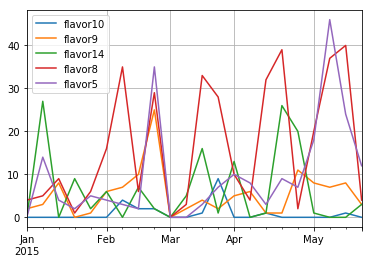

In [56]:
%matplotlib inline
weekly_data.plot(grid='on',y=['flavor10','flavor9','flavor14','flavor8','flavor5'])